In [16]:
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

### EDA

In [25]:
songs = pd.read_csv('songs.csv')

In [26]:
songs.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [27]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [28]:
train, test = train_test_split(songs, test_size = .20)

In [29]:
print('Training size: {}, Test size: {}'.format(len(train), len(test)))

Training size: 1613, Test size: 404


In [30]:
#Color Palette
red_blue = ['#195B5E', '#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('white')

In [31]:
pos_tempo = songs[songs['target'] ==1]['tempo']
neg_tempo = songs[songs['target'] ==0]['tempo']

pos_danceability = songs[songs['target'] ==1]['danceability']
neg_danceability = songs[songs['target'] ==0]['danceability']

pos_duration = songs[songs['target'] ==1]['duration_ms']
neg_duration = songs[songs['target'] ==0]['duration_ms']

pos_loudness = songs[songs['target'] ==1]['loudness']
neg_loudness = songs[songs['target'] ==0]['loudness']

pos_speechiness = songs[songs['target'] ==1]['speechiness']
neg_speechiness = songs[songs['target'] ==0]['speechiness']

pos_valence = songs[songs['target'] ==1]['valence']
neg_valence = songs[songs['target'] ==0]['valence']

pos_energy = songs[songs['target'] ==1]['energy']
neg_energy = songs[songs['target'] ==0]['energy']

pos_acousticness = songs[songs['target'] ==1]['acousticness']
neg_acousticness = songs[songs['target'] ==0]['acousticness']

pos_key = songs[songs['target'] ==1]['key']
neg_key = songs[songs['target'] ==0]['key']

pos_instrumentalness = songs[songs['target'] ==1]['instrumentalness']
neg_instrumentalness = songs[songs['target'] ==0]['instrumentalness']

C:\Users\MN101994\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
C:\Users\MN101994\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MN101994\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning

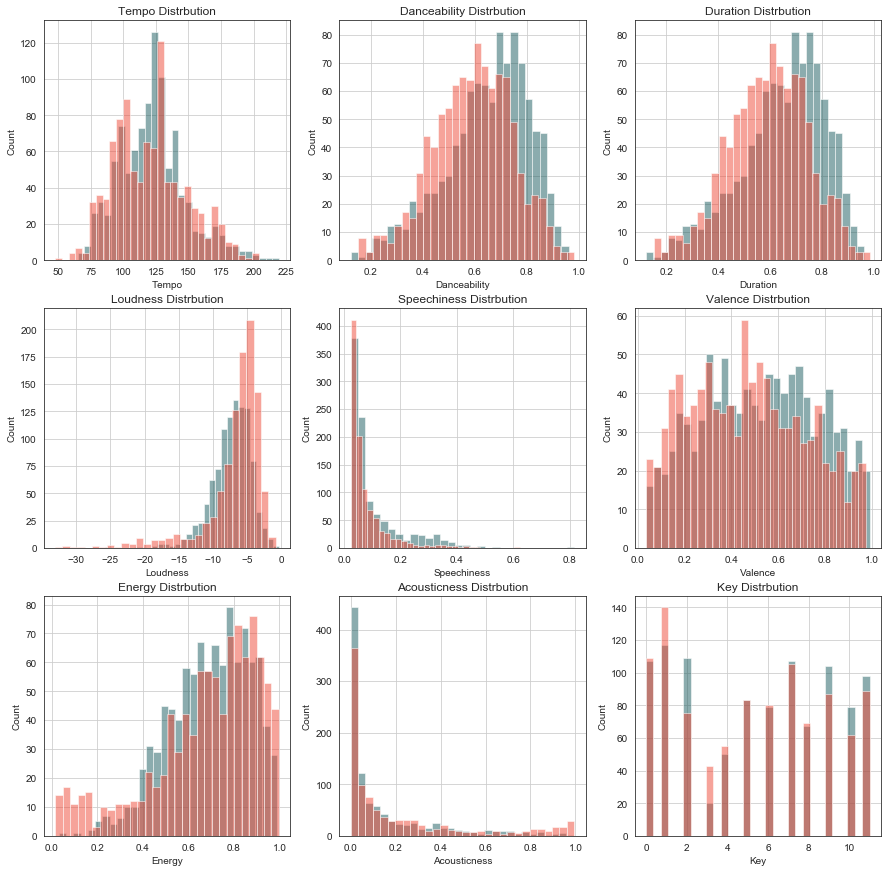

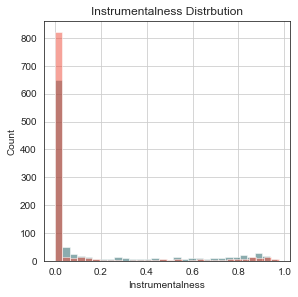

In [32]:
fig = plt.figure(figsize=(15,15))

#tempo
ax3= fig.add_subplot(331)
ax3.set_xlabel('Tempo')
ax3.set_ylabel('Count')
ax3.set_title('Tempo Distrbution')
pos_tempo.hist(alpha = .5, bins = 30)
ax4= fig.add_subplot(331)
neg_tempo.hist(alpha = .5, bins = 30)

#danceability
ax5= fig.add_subplot(332)
ax5.set_xlabel('Danceability')
ax5.set_ylabel('Count')
ax5.set_title('Danceability Distrbution')
pos_danceability.hist(alpha = .5, bins = 30)
ax6= fig.add_subplot(332)
neg_danceability.hist(alpha = .5, bins = 30)

#duration
ax7= fig.add_subplot(333)
ax7.set_xlabel('Duration')
ax7.set_ylabel('Count')
ax7.set_title('Duration Distrbution')
pos_danceability.hist(alpha = .5, bins = 30)
ax8= fig.add_subplot(333)
neg_danceability.hist(alpha = .5, bins = 30)

#Loudness
ax9= fig.add_subplot(334)
ax9.set_xlabel('Loudness')
ax9.set_ylabel('Count')
ax9.set_title('Loudness Distrbution')
pos_loudness.hist(alpha = .5, bins = 30)
ax10= fig.add_subplot(334)
neg_loudness.hist(alpha = .5, bins = 30)

#Speechiness
ax11= fig.add_subplot(335)
ax11.set_xlabel('Speechiness')
ax11.set_ylabel('Count')
ax11.set_title('Speechiness Distrbution')
pos_speechiness.hist(alpha = .5, bins = 30)
ax12= fig.add_subplot(335)
neg_speechiness.hist(alpha = .5, bins = 30)

#valence
ax13= fig.add_subplot(336)
ax13.set_xlabel('Valence')
ax13.set_ylabel('Count')
ax13.set_title('Valence Distrbution')
pos_valence.hist(alpha = .5, bins = 30)
ax14= fig.add_subplot(336)
neg_valence.hist(alpha = .5, bins = 30)

#energy
ax14= fig.add_subplot(337)
ax14.set_xlabel('Energy')
ax14.set_ylabel('Count')
ax14.set_title('Energy Distrbution')
pos_energy.hist(alpha = .5, bins = 30)
ax15= fig.add_subplot(337)
neg_energy.hist(alpha = .5, bins = 30)

#acousticness
ax16= fig.add_subplot(338)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('Count')
ax16.set_title('Acousticness Distrbution')
pos_acousticness.hist(alpha = .5, bins = 30)
ax17= fig.add_subplot(338)
neg_acousticness.hist(alpha = .5, bins = 30)

#key
ax18= fig.add_subplot(339)
ax18.set_xlabel('Key')
ax18.set_ylabel('Count')
ax18.set_title('Key Distrbution')
pos_key.hist(alpha = .5, bins = 30)
ax19= fig.add_subplot(339)
neg_key.hist(alpha = .5, bins = 30)


fig2 = plt.figure(figsize=(15,15))
#instrumentalness
ax20= fig2.add_subplot(331)
ax20.set_xlabel('Instrumentalness')
ax20.set_ylabel('Count')
ax20.set_title('Instrumentalness Distrbution')
pos_instrumentalness.hist(alpha = .5, bins = 30)
ax21= fig2.add_subplot(331)
neg_instrumentalness.hist(alpha = .5, bins = 30)

### My Playlists

In [9]:
import pandas as pd
import spotipy
import spotipy.util as util 
import yaml
import os

In [2]:
def load_config():
    '''Load Spotify credentials from yaml file.'''
    global user_config
    stream = open('config.yaml')
    user_config = yaml.load(stream)

In [7]:
def get_songs():
    '''Get songs from Spotify playlist'''
    sp.trace=False 
    playlist = sp.user_playlist(user_config['username'], user_config['playlist_id']) 
    songs = playlist["tracks"]["items"] 
    ids = [] 
    for i in range(len(songs)): 
        ids.append(songs[i]["track"]["id"]) 
    features = sp.audio_features(ids) 
    df = pd.DataFrame(features)
    return df

In [15]:
def main():
    global sp
    global user_config
    load_config()
    token = util.prompt_for_user_token(user_config['username'], scope='playlist-modify-private,playlist-modify-public', client_id=user_config['client_id'], client_secret=user_config['client_secret'], redirect_uri=user_config['redirect_uri'])
    if token:
        sp = spotipy.Spotify(auth=token)
        df = get_songs()
        cwd = os.getcwd()
        csv = df.to_csv(cwd+'\mylikedsongs.csv',index=True)
    else:
        print ("Can't get token for", user_config['username'])
        
if __name__ == "__main__":
    main()

C:\Users\MN101994\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """
